# Shi-Tomasi Corner Detection and Circularity

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.io import write_image
import cv2 as cv
from IPython.display import Image
from utils import load_split_images, create_image_fig, visualize_corners

In [5]:
train, val, test = load_split_images('../OfficeCaltechDomainAdaptation/images/')

In [10]:
max_px = 0
max_idx = 0
max_shape = None
for idx, img in enumerate(train[3]):
    img_arr = np.array(img)
    cur_px = img_arr.shape[0] * img_arr.shape[1]
    if cur_px > max_px:
        max_px = cur_px
        max_idx = idx
        max_shape = img_arr.shape

In [14]:
train[0][max_idx]

'caltech10'

### Visualizing Sample Images

backpack


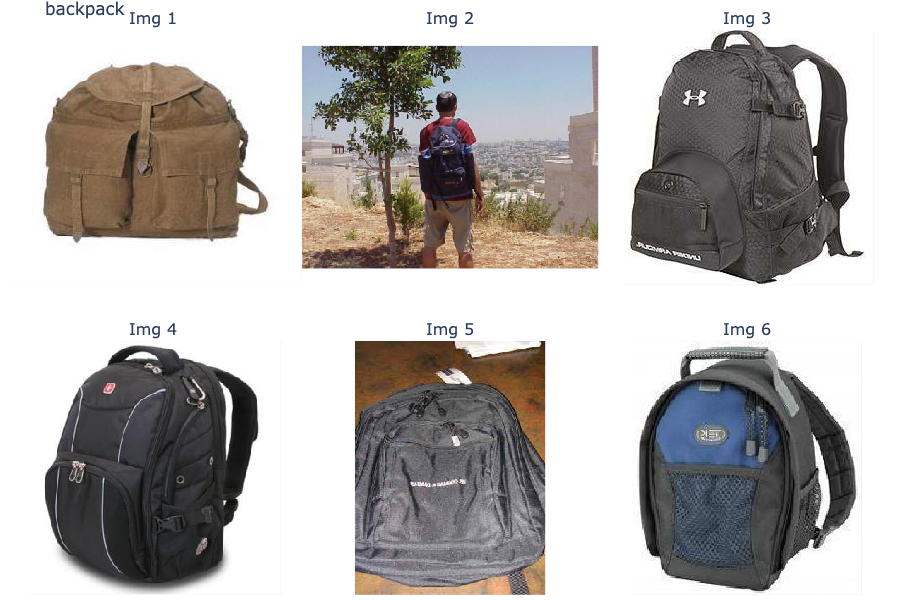

bike


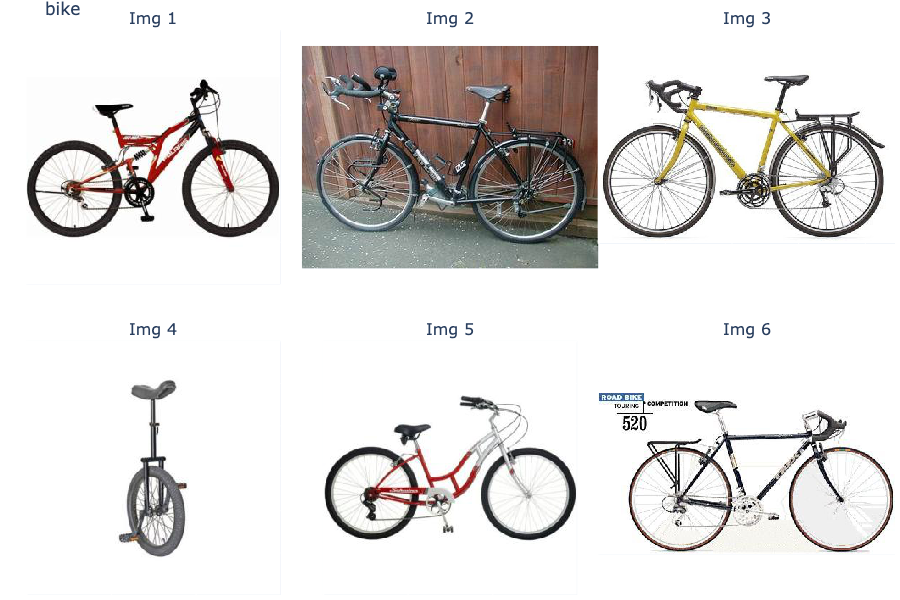

calculator


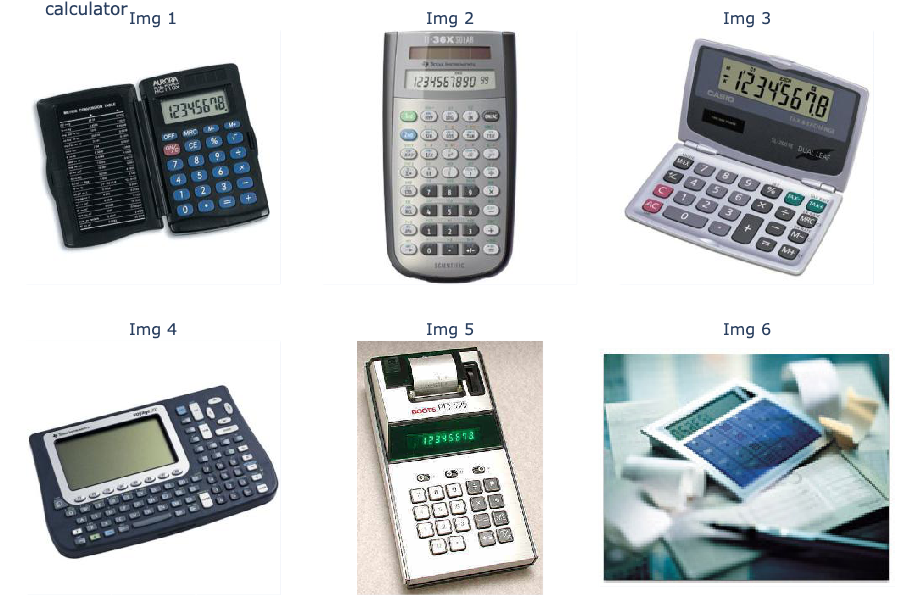

headphones


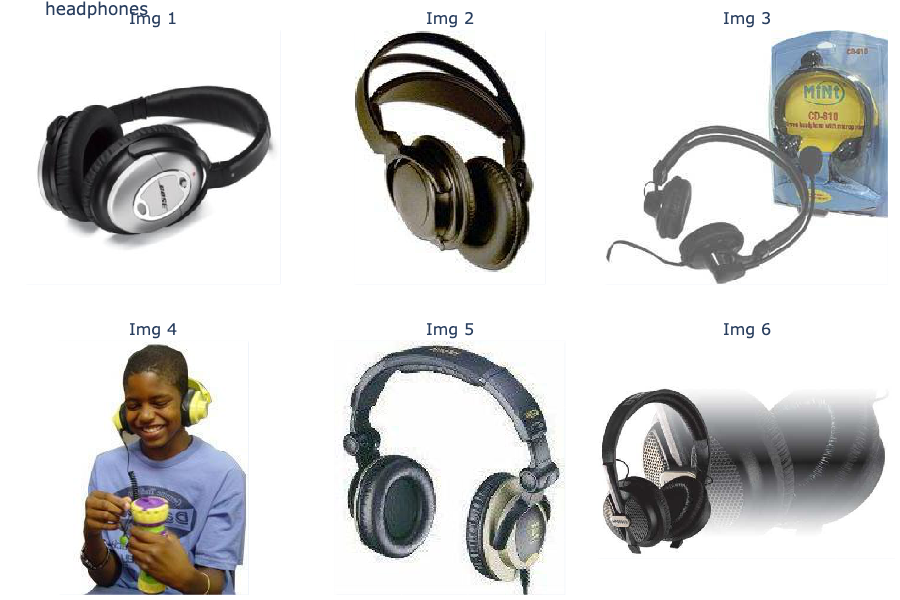

keyboard


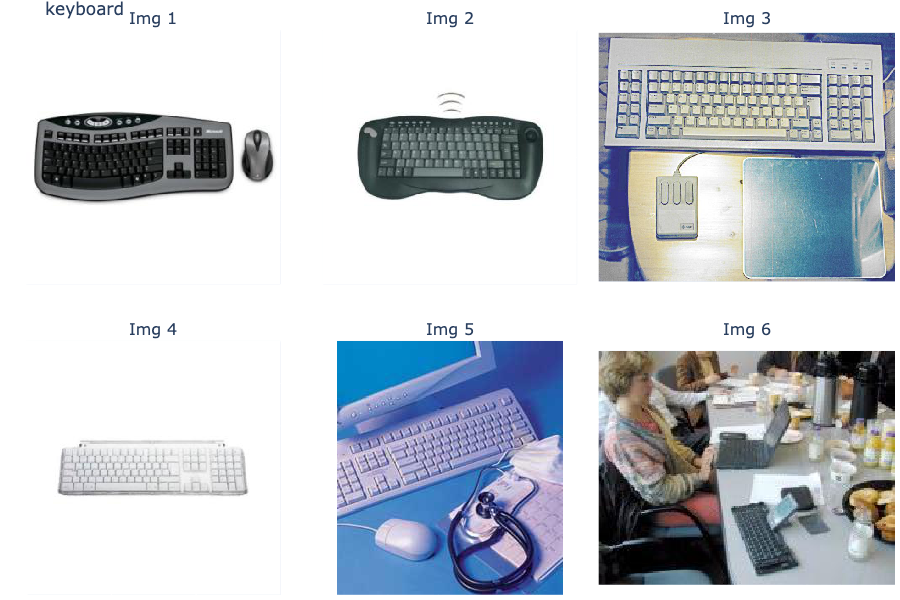

laptop


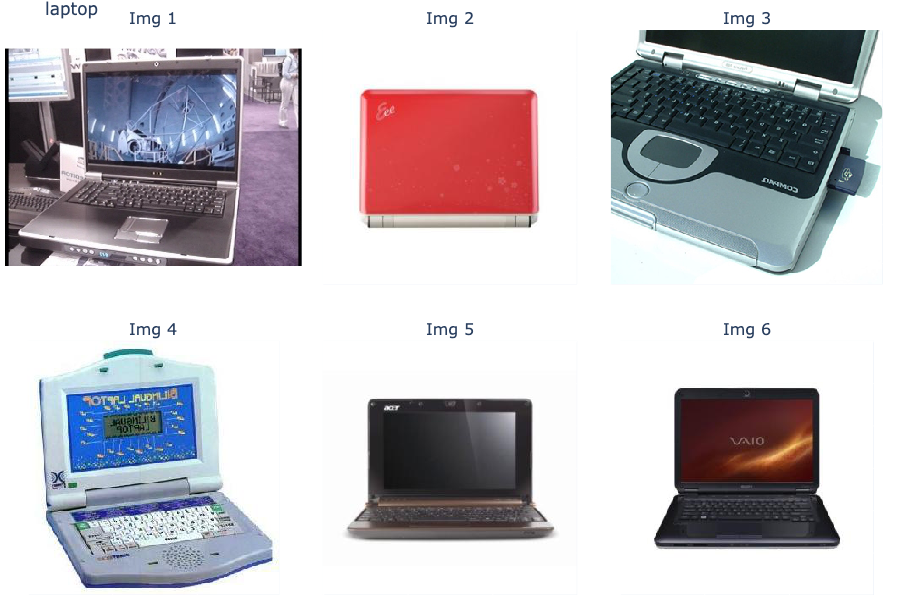

monitor


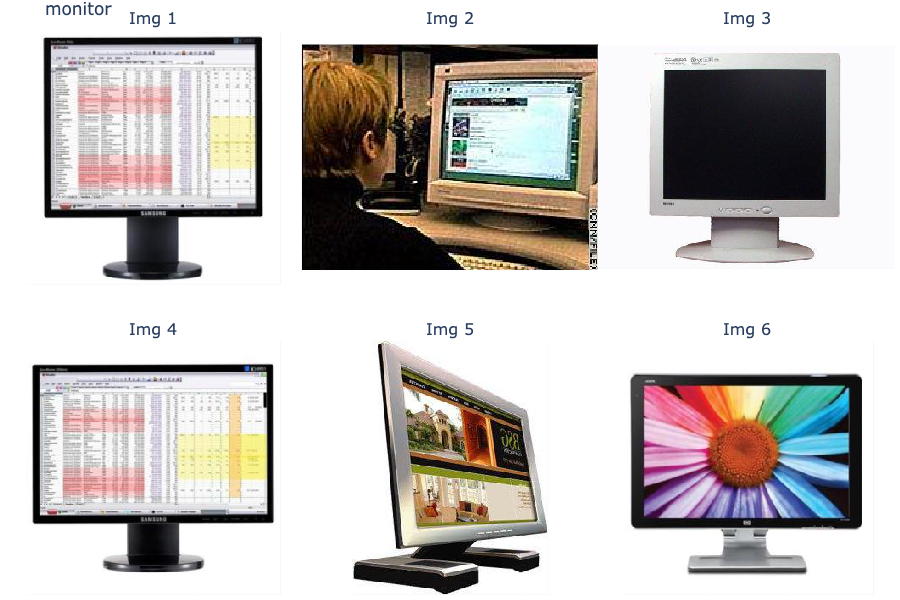

mouse


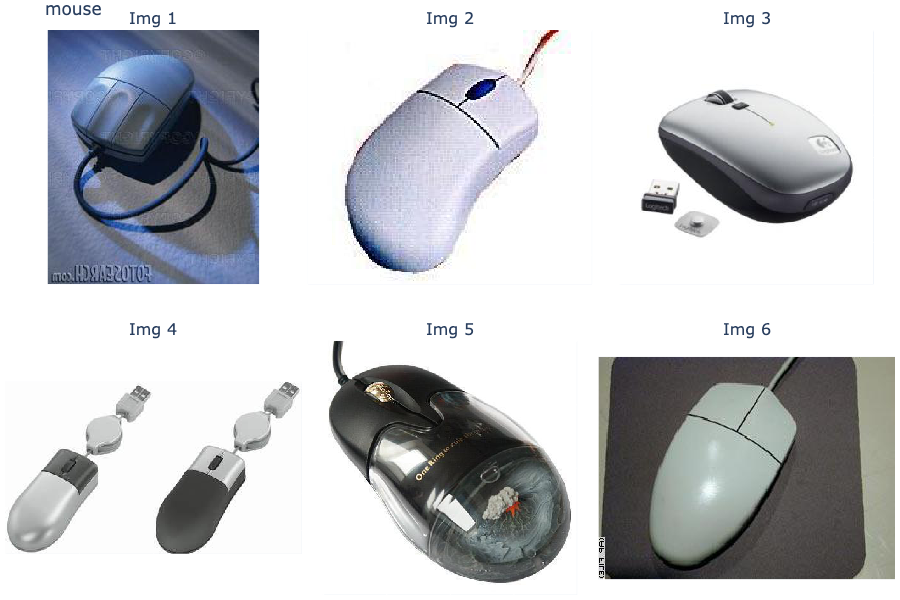

mug


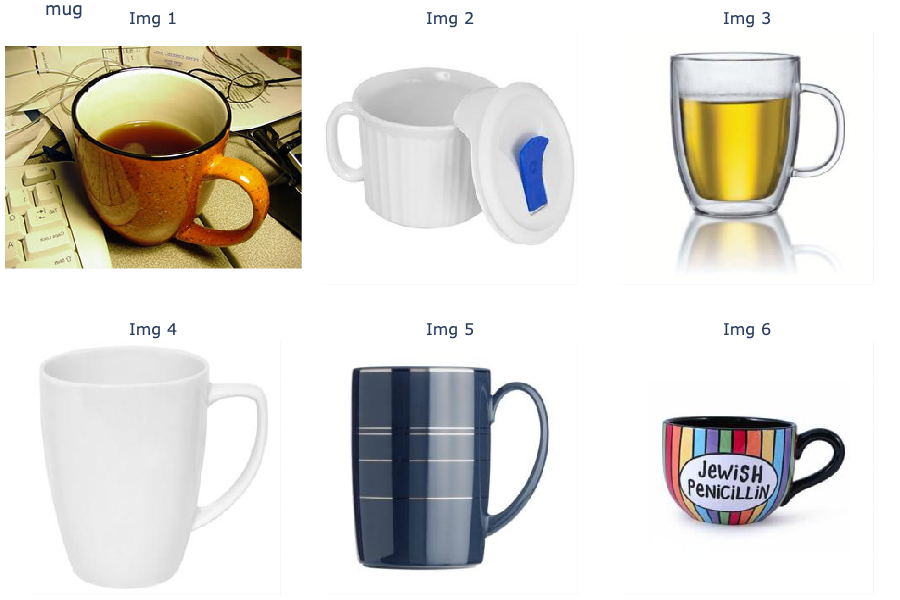

projector


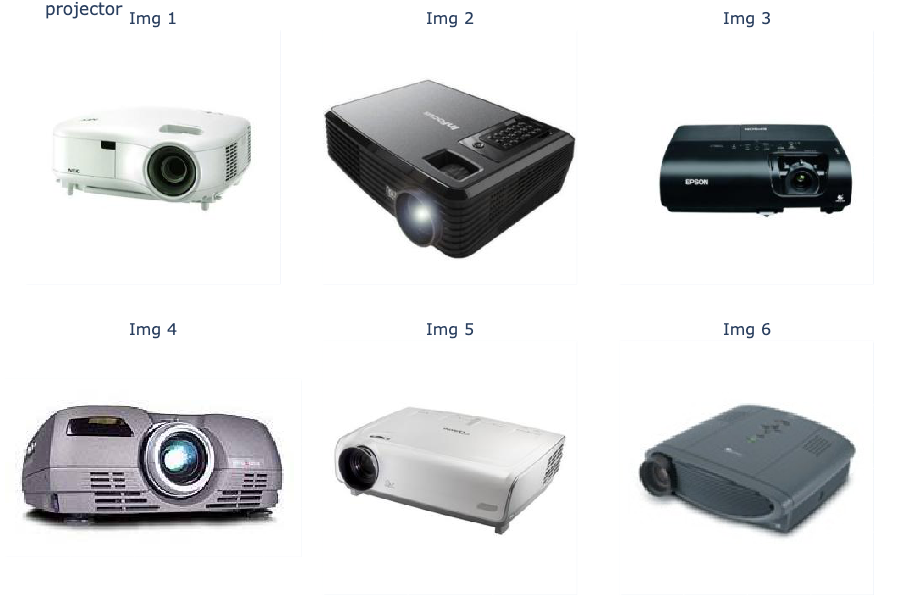

In [4]:
for label in np.unique(train[1]):
    print(label)
    sample_size = 6
    cur_label_idx = np.arange(len(train[1]))[train[1]==label]
    sample_idx = np.random.choice(cur_label_idx, sample_size)
    
    imgs = []
    for idx in sample_idx:
        imgs.append(train[3][idx])
    fig = create_image_fig(imgs)
    fig.update_layout(title=label)
    
    # I have no idea why, but subplots of images (tested using matplotlib as well)
    # lead to INSANE (>300mb) file sizes for this python notebook.
    # so, using ipython to display it instead
    fig.write_image(file="tmp_image.png", format="png", scale=1)
    display(Image('tmp_image.png'))
    
    # fig.show(config={"staticPlot": True})

Definitely looks like corner detection will be helpful. Possible ideas:
- create a feature that will discriminate between smooth objects vs very angular objects
- create a feature that will discriminate between very "craggy" objects vs objects with smooth curves 

### Smooth vs Angular
Look for high-quality corners only. Corners should be spaced out and represent true corners of objects (not noise introduced by, e.g. white lettering on black backgrounds)

This didn't seem to work well, especially since many objects are pale and on a white background -> edge detection is quite bad.

In [43]:
np.random.seed(888)
for label in np.unique(train[1]):
    print(label)
    sample_size = 1
    cur_label_idx = np.arange(len(train[1]))[train[1]==label]
    sample_idx = np.random.choice(cur_label_idx, sample_size)
    
    imgs = []
    for idx in sample_idx:
        imgs.append(train[3][idx])
        
    visualize_corners(imgs[0], maxCorners=30, qualityLevel=0.7, minDistance=30)

backpack


bike


calculator


headphones


keyboard


laptop


monitor


mouse


mug


projector


### Craggy vs Non-Craggy Objects
This one shows promise!

In [44]:
np.random.seed(88)
for label in np.unique(train[1]):
    print(label)
    sample_size = 1
    cur_label_idx = np.arange(len(train[1]))[train[1]==label]
    sample_idx = np.random.choice(cur_label_idx, sample_size)
    
    imgs = []
    for idx in sample_idx:
        imgs.append(train[3][idx])
        
    visualize_corners(imgs[0], maxCorners=50, qualityLevel=0.5, minDistance=10)

backpack


bike


calculator


headphones


keyboard


laptop


monitor


mouse


mug


projector


In [83]:
num_corners=[]
labels=[]
for label in np.unique(train[1]):
    cur_label_idx = np.arange(len(train[1]))[train[1]==label]

    for idx in cur_label_idx:
        img = train[3][idx]
        try:
            gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        except:
            gray_img = img
        corners = cv.goodFeaturesToTrack(gray_img, maxCorners=100, qualityLevel=0.2, minDistance=5, useHarrisDetector=False)
        if corners is not None:
            num_corners.append(len(corners[:,0,:]))
        else:
            num_corners.append(0)
        labels.append(label)
    
df = pd.DataFrame(data=[labels, num_corners]).transpose()
df.columns = ['label', 'corners']
px.violin(
    data_frame=df,
    x='label',
    y='corners',
    title='Distribution of Corners in Each Label'
)